## M345SC 2019 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

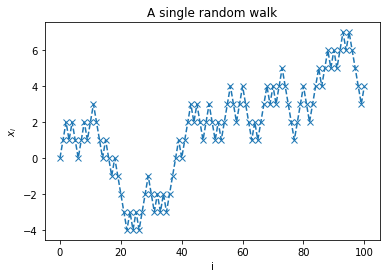

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()

Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

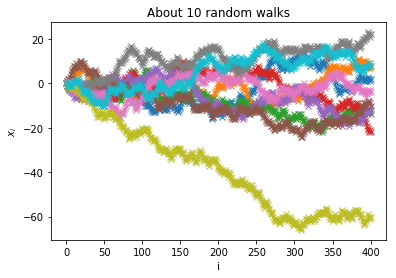

dt=0.871145


In [2]:
from time import time

def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

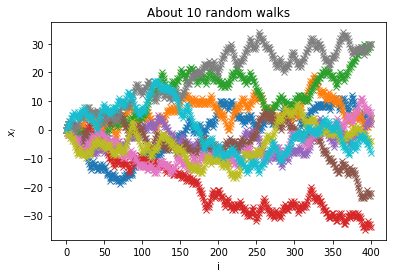

dt=0.006701


In [3]:
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    #**Modify code below and add code here**
    step = np.random.choice((-1,1), size=(Nt, M))
    
    #M Nt-step random walks
    for i in range(Nt):
        x[i+1,:] = x[i,:] + step[i,:]

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out2 = rwalk2(display=True)
print("dt=%f" %out2[1])

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

rwalk2 is faster by 130.002384 times.
Mean of $x_i$ across the M-samples =  [ 0.     0.06   0.092  0.076  0.088  0.004  0.044  0.004  0.016 -0.012
  0.012 -0.028 -0.056 -0.096 -0.24  -0.196 -0.192 -0.208 -0.236 -0.2
 -0.24  -0.244 -0.276 -0.328 -0.356 -0.416 -0.32  -0.288 -0.264 -0.232
 -0.18  -0.184 -0.144 -0.1   -0.084 -0.1   -0.064 -0.072 -0.1   -0.092
 -0.124 -0.016  0.008 -0.048 -0.072  0.032  0.08   0.06   0.132  0.108
  0.132  0.16   0.212  0.184  0.216  0.128  0.28   0.2    0.232  0.252
  0.204  0.144  0.136  0.116  0.076  0.12   0.16   0.172  0.172  0.216
  0.18   0.16   0.144  0.104  0.12   0.176  0.16   0.152  0.188  0.2
  0.212  0.128  0.064  0.08   0.12   0.124  0.092  0.112  0.116  0.136
  0.108  0.208  0.224  0.192  0.172  0.188  0.216  0.18   0.136  0.084
  0.028 -0.04   0.    -0.052  0.012  0.048  0.076  0.096  0.12   0.048
  0.108  0.184  0.096  0.06   0.     0.016  0.06   0.072  0.08   0.072
  0.152  0.192  0.188  0.188  0.24   0.276  0.324  0.372  0.364  0.408
  0.4

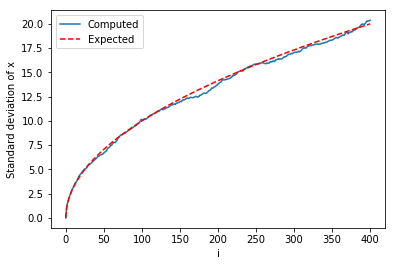

In [5]:
#Add code here
print("rwalk2 is faster by %f times." %(out[1]/out2[1]))
mean = np.mean(out2[0], axis=1)
sd = np.std(out2[0], axis=1)

print("Mean of $x_i$ across the M-samples = ", mean)
print("Standard Deviation of $x_i$ across the M-samples = ", sd)

#### Corrections
i = np.arange((out2[0]).shape[0])
plt.plot(sd, '-')
plt.plot(np.sqrt(i), 'r--')
plt.xlabel('i')
plt.ylabel('Standard deviation of x')
plt.legend(("Computed","Expected"))
plt.show()

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [6]:
import numpy as np
#Add code here
N = np.random.rand(3,3)
N

array([[0.97747788, 0.32889899, 0.1706685 ],
       [0.48485216, 0.01715966, 0.10617678],
       [0.57820846, 0.46397227, 0.13890181]])

2) Compute the eigenvalues and eigenvectors of N:

In [7]:
#Add code here
eigval, eigvec = np.linalg.eig(N)
print("Eigenvalues and respective eigenvectors of N are:")
for i, v in enumerate(eigval):
    print("Eigenvalue %d" %i, v, "v%d" %i, eigvec[:,i])

Eigenvalues and respective eigenvectors of N are:
Eigenvalue 0 1.2485570833052186 v0 [-0.76402422 -0.34768998 -0.54348751]
Eigenvalue 1 0.05286936049733158 v1 [-0.20777068  0.07812666  0.9750526 ]
Eigenvalue 2 -0.16788710181846705 v2 [ 0.05107732 -0.59434265  0.80258826]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [8]:
#Add code here
np.linalg.det(N-np.dot(eigval[0],np.eye(3)))

5.986169200174281e-16

4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [9]:
#Add code here
N.dot(eigvec[:,0]) - eigval[0]*eigvec[:,0]

array([-1.11022302e-16, -2.22044605e-16, -1.11022302e-16])